# AirBNB Prediction Model (linear regression) 

In [20]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

def prepare_X(df):
    X = df.copy()
    X.reviews_per_month = X.reviews_per_month.fillna(0).values
    return X

'''split dataset index'''

def split_data(df, seed):
    n = len(df)

    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test

    '''shuffle dataset index'''
    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)
    idx[0]

    '''split dataset'''
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]

    '''reset index in dataset'''
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    '''save target column "msrp" in log form'''
    y_train = np.log1p(df_train.price.values)
    y_val = np.log1p(df_val.price.values)
    y_test = np.log1p(df_test.price.values)

    '''remove target column from dataset'''
    del df_train['price']
    del df_val['price']
    del df_test['price']

    return df_train, df_val, df_test, y_train, y_val, y_test

## Read Data

In [12]:
import pandas as pd
import numpy as np

df = pd.read_csv('AB_NYC_2019.csv')

## Data Preparation

In [13]:
'''prepare column names'''
def data_prep(column):
    return column.str.lower().str.replace(' ', '_')

df.columns = data_prep(df.columns)
df.columns
'''need to use only these columns:

* `'latitude'`,
* `'longitude'`,
* `'price'`,
* `'minimum_nights'`,
* `'number_of_reviews'`,
* `'reviews_per_month'`,
* `'calculated_host_listings_count'`,
* `'availability_365'`
'''
df = df.drop(columns=['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'room_type', 'last_review'])

# df.dtypes[df.dtypes == 'object'].index)
#     df[col] = data_prep(df[col])

In [14]:
df.dtypes

latitude                          float64
longitude                         float64
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

## Exploratory data analysis

<AxesSubplot:xlabel='price', ylabel='Count'>

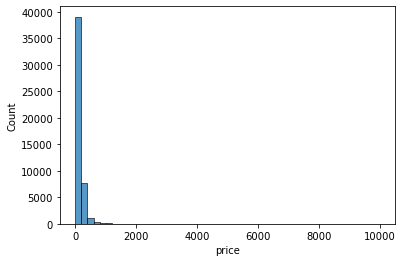

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.histplot(df.price, bins=50)

<AxesSubplot:xlabel='price', ylabel='Count'>

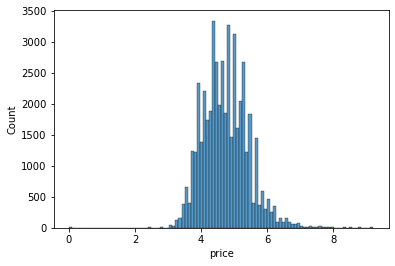

In [16]:
price_logs = np.log1p(df.price)
sns.histplot(price_logs, bins=100)

## Question 1

Find a feature with missing values. How many missing values does it have?

In [17]:
df.isnull().sum()


latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

## Question 2

What's the median (50% percentile) for variable 'minimum_nights'?

In [18]:
df['minimum_nights'].median()

3.0

## Setting up the validation framework

## Split the data

* Shuffle the initial dataset, use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Make sure that the target value ('price') is not in your dataframe.
* Apply the log transformation to the price variable using the `np.log1p()` function.


## Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lesssons.
* For computing the mean, use the training only!
* Compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?



## Training linear regression model

### Train a linear regression model with value = 0


RMSE with 0: 0.6428860484860389
RMSE with 0: 0.64


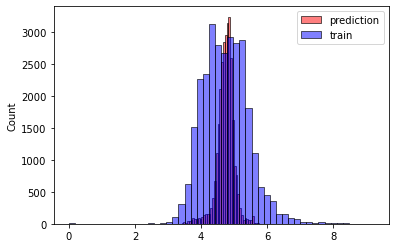

In [29]:
seed = 42
df_train, df_val, df_test, y_train, y_val, y_test = split_data(df, seed)

X_train = df_train
X_train.reviews_per_month = X_train.reviews_per_month.fillna(0).values

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

'''diagram'''
sns.histplot(y_pred, label='prediction', color='red', alpha=0.5, bins=50)
sns.histplot(y_train, label='train', color='blue', alpha=0.5, bins=50)
plt.legend()

rmse_null = rmse(y_train, y_pred)
print('RMSE with 0: {0}'.format(rmse_null))
print('RMSE with 0: {0}'.format(round(rmse_null, 2)))

### Train a linear regression model with the mean of this variable


RMSE with mean: 0.64


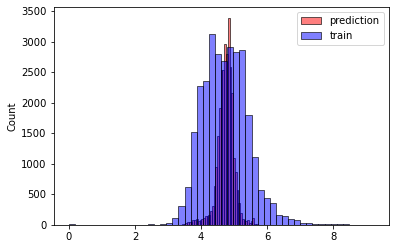

In [30]:
seed = 42
df_train, df_val, df_test, y_train, y_val, y_test = split_data(df, seed)

X_train = df_train
reviews_mean = X_train.reviews_per_month.mean()
X_train.reviews_per_month = X_train.reviews_per_month.fillna(reviews_mean).values

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

'''diagram'''
sns.histplot(y_pred, label='prediction', color='red', alpha=0.5, bins=50)
sns.histplot(y_train, label='train', color='blue', alpha=0.5, bins=50)
plt.legend()

rmse_mean = round(rmse(y_train, y_pred), 2)
print('RMSE with mean: {0}'.format(rmse_mean))


## Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]`.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

In [31]:
seed = 42
df_train, df_val, df_test, y_train, y_val, y_test = split_data(df, seed)

for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    res = round(rmse(y_val, y_pred), 2)
    print(res)

0.64
0.64
0.64
0.64
0.66
0.68
0.68
0.68
0.68


## Question 5 

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)


> Note: Standard deviation shows how different the values are.
> If it's low, then all values are approximately the same.
> If it's high, the values are different. 
> If standard deviation of scores is low, then our model is *stable*.


In [39]:
def rmse_scores(seed):
    df_train, df_val, df_test, y_train, y_val, y_test = split_data(df, seed)

    X_Train = df_train
    X_Train.reviews_per_month = X_Train.reviews_per_month.fillna(0).values
    
    w0, w = train_linear_regression(X_train, y_train)
    y_pred = w0 + X_train.dot(w)
    
    return rmse(y_train, y_pred)

rmse_lst = list(
    map(
        rmse_scores,
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    )
)

round(np.std(rmse_lst), 3)

0.004

## Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Train a model with `r=0.001`.
* What's the RMSE on test dataset?

In [43]:
seed = 9
df_train, df_val, df_test, y_train, y_val, y_test = split_data(df, seed)

df_full_train = pd.concat([df_train, df_val]).reset_index(drop=True)
X_full_train = prepare_X(df_full_train)
y_full_train = np.concatenate([y_train, y_val])

w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
rmse_score = rmse(y_test, y_pred)

round(rmse_score, 2)

0.65